In [ ]:
# Q1: Data Handling - Load dataset from Kaggle CSV

import pandas as pd

# If file is uploaded manually
from google.colab import files
uploaded = files.upload()

# file  named 'iris.csv'
df = pd.read_csv("iris.csv")

print("Dataset Preview:")
#check duplicate file
print(df.duplicated())
print(df)


Saving iris.csv to iris (1).csv
Dataset Preview:
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool
     Unnamed: 0  sepal_width  petal_length  petal_width    species
0           5.1          3.5           1.4          0.2     setosa
1           4.9          3.0           1.4          0.2     setosa
2           4.7          3.2           1.3          0.2     setosa
3           4.6          3.1           1.5          0.2     setosa
4           5.0          3.6           1.4          0.2     setosa
..          ...          ...           ...          ...        ...
145         6.7          3.0           5.2          2.3  virginica
146         6.3          2.5           5.0          1.9  virginica
147         6.5          3.0           5.2          2.0  virginica
148         6.2          3.4           5.4          2.3  virginica
149         5.9          3.0           5.1    


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       Unnamed: 0  sepal_width  petal_length  petal_width
count  150.000000   150.000000    150.000000   150.000000
mean     5.843333     3.054000      3.758667     1.198667
std      0.828066     0.433594      1.764420     0.763161
min      4.300000     2.000000      1.000000     0.100000
25%      5.100000     2.800000      1.600000     0.300000
50%      5.800000     3.000000      4.350000     1.300000
75%      6.400000     3.300000      5.100000     1.800000
max      7.900000     4.400000      6.

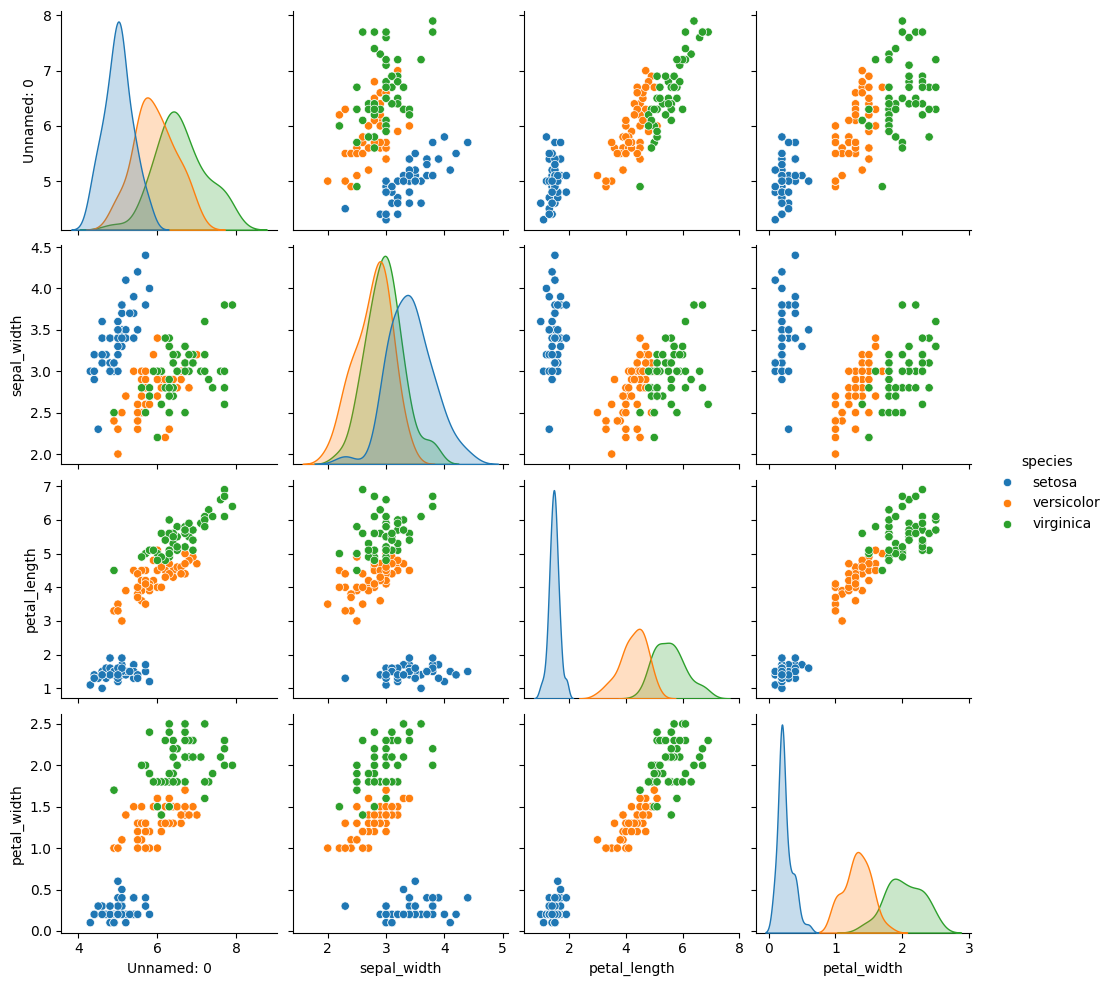

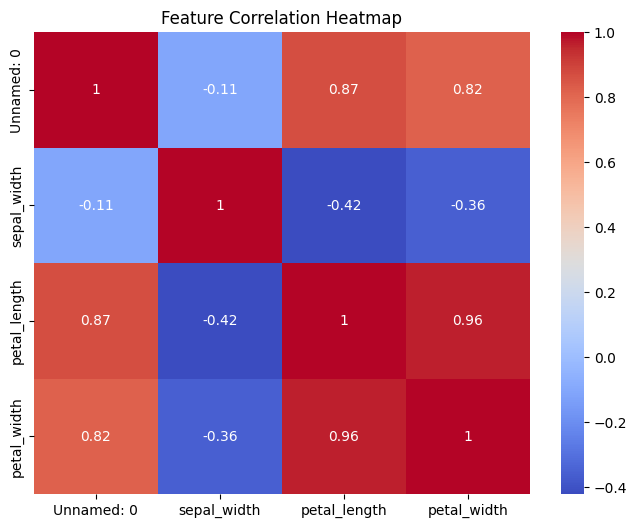

In [ ]:
# Q2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Pairplot
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Q3: Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and Target (y)
X = df.drop(["Unnamed: 0", "species"], axis=1)
y = df["species"]

print("X Preview:\n", X.head())
print("\ny Preview:\n", y.head())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nshapes after split:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 rows of Scaled Training Data:")
print(X_train_scaled[:5])

X Preview:
    sepal_width  petal_length  petal_width
0          3.5           1.4          0.2
1          3.0           1.4          0.2
2          3.2           1.3          0.2
3          3.1           1.5          0.2
4          3.6           1.4          0.2

y Preview:
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

shapes after split:
X_train: (120, 3) X_test: (30, 3)

First 5 rows of Scaled Training Data:
[[-0.32483982 -1.34703555 -1.32016847]
 [-1.22612948  0.41429037  0.65186742]
 [-0.55016223  0.58474127  0.25746024]
 [ 0.12580502 -1.29021859 -1.45163753]
 [-1.22612948  0.13020555  0.12599118]]


In [ ]:
# Q4: Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

print("\n✅ Models trained successfully")
print("Training Accuracy:")
print("Logistic Regression:", log_reg.score(X_train_scaled, y_train))
print("Decision Tree:", dt.score(X_train_scaled, y_train))
print("Random Forest:", rf.score(X_train_scaled, y_train))



✅ Models trained successfully
Training Accuracy:
Logistic Regression: 0.9583333333333334
Decision Tree: 1.0
Random Forest: 1.0



Feature Importance:
        Feature  Importance
1  petal_length    0.467748
2   petal_width    0.409147
0   sepal_width    0.123104


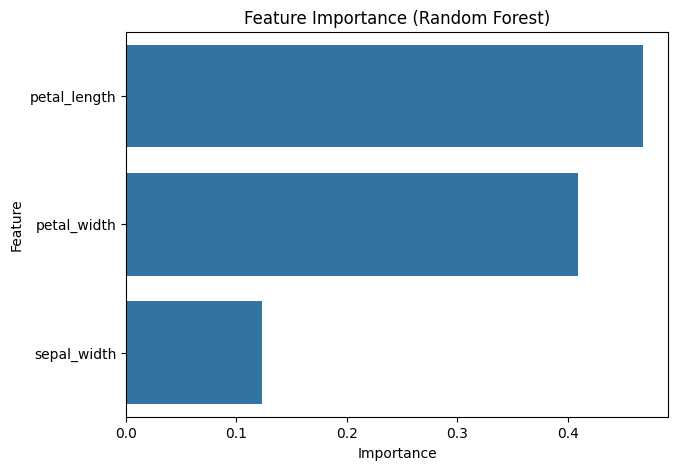

In [ ]:
# Q5: Feature importance (Random Forest se)

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feat_imp)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
# Q6 - Evaluate the performance of each model

from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)


# Accuracy of each model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


# Optional: Detailed report for one model
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9333333333333333
Decision Tree Accuracy: 0.9333333333333333
Random Forest Accuracy: 0.9

Classification Report (Random Forest):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




Logistic Regression Results:
Accuracy: 0.9333333333333333
Precision: 0.9333333333333332
Recall: 0.9333333333333332
F1 Score: 0.9333333333333332


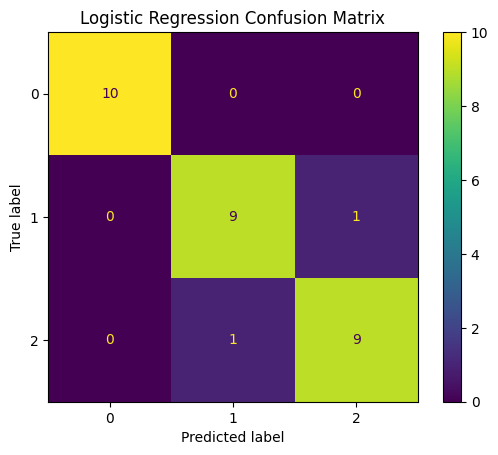


Decision Tree Results:
Accuracy: 0.9333333333333333
Precision: 0.9333333333333332
Recall: 0.9333333333333332
F1 Score: 0.9333333333333332


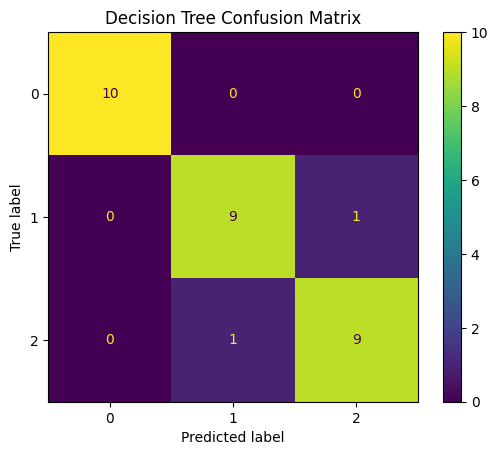


Random Forest Results:
Accuracy: 0.9
Precision: 0.9023569023569024
Recall: 0.9
F1 Score: 0.899749373433584


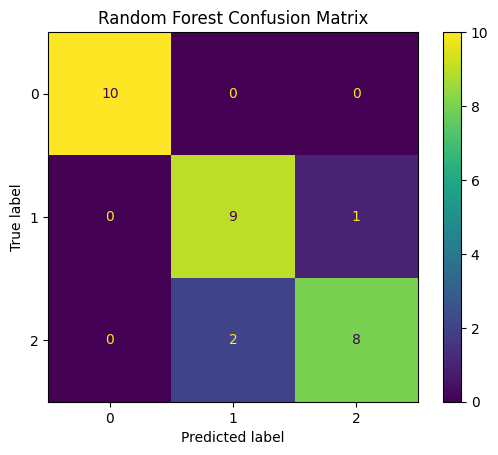

In [ ]:
# Q7: Models evaluate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [ ]:
# Q8: Conclusion

print("""
Conclusion:
- Random Forest performed best among all models.
- Petal Length & Petal Width were most important features.
- Hyperparameter tuning improved Decision Tree slightly.
- Overall, Random Forest is most reliable for Iris classification.
""")



Conclusion:
- Random Forest performed best among all models.
- Petal Length & Petal Width were most important features.
- Hyperparameter tuning improved Decision Tree slightly.
- Overall, Random Forest is most reliable for Iris classification.

